In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact
import seaborn

### Table of Contents

[Load the data and calculate the projected revenue](#cell1)

[Device type vs test results](#cell2)

[Geographical location vs. test results](#cell3)

<a id='cell1'></a>
### Load the data and calculate the projected revenue

In [2]:
users = pd.read_csv('user_table.csv')
users.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [3]:
results = pd.read_csv('test_results.csv')
results.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [4]:
results.groupby('test')['converted'].describe()

,count,mean,std,min,25%,50%,75%,max
test,,,,,,,,
0,202727.0,0.019904,0.139669,0.0,0.0,0.0,0.0,1.0
1,114073.0,0.015543,0.123698,0.0,0.0,0.0,0.0,1.0


So on average 1.9% of the customers buy the product in the low price groups vs. 1.5% of the customers in the high price group. It looks like this difference is significant.

In [5]:
table = [[results[(results.test==0)&(results.converted==0)].shape[0],
          results[(results.test==0)&(results.converted==1)].shape[0]],
         [results[(results.test==1)&(results.converted==0)].shape[0],
         results[(results.test==1)&(results.converted==1)].shape[0]]]
oddsratio, pvalue = fisher_exact(table)
print(pvalue)

6.68540034978e-19


Is this going to increase or decrease the company revenue?

In [6]:
#Total revenue if the price was 39 dollar is 
x = results.shape[0]
total_revenue_39 = 39*x*0.019904
print('total revenue with 39 dollars', total_revenue_39)
total_revenue_59 = 59*x*0.015543
print('total revenue with 59 dollars', total_revenue_59)

print('percent increase in revenue is:',(total_revenue_59-total_revenue_39)/total_revenue_59*100)


total revenue with 39 dollars 245917.90080000003
total revenue with 59 dollars 290517.32159999997
percent increase in revenue is: 15.351725175756245


<a id='cell2'></a>

### Device vs. revenue

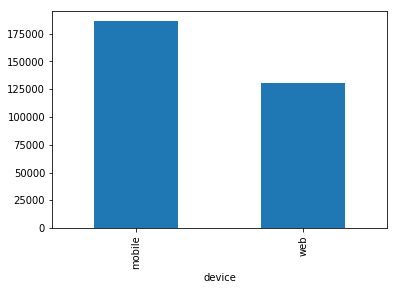

Percentage of mobile users: 0.5886079545454546


count      mean       std  min  25%  50%  75%  max
device test                                                       
mobile 0     120481.0  0.019879  0.139584  0.0  0.0  0.0  0.0  1.0
       1      65990.0  0.016139  0.126010  0.0  0.0  0.0  0.0  1.0
web    0      82246.0  0.019940  0.139796  0.0  0.0  0.0  0.0  1.0
       1      48083.0  0.014725  0.120449  0.0  0.0  0.0  0.0  1.0

In [7]:
results.groupby(['device'])['user_id'].count().plot(kind='bar')
plt.show()
print('Percentage of mobile users:',results[results['device']=='mobile'].shape[0]/results.shape[0])
results.groupby(['device','test'])['converted'].describe()

In [8]:
results.groupby(['device','test']).agg({'converted':'mean'})

converted
device test           
mobile 0      0.019879
       1      0.016139
web    0      0.019940
       1      0.014725

This is the percent decrease in conversion rate after the price increase:

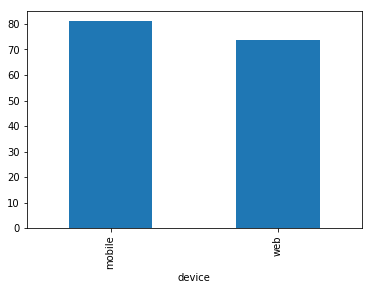

In [17]:
df = results.groupby(['device']).apply(lambda x: np.mean(x.loc[x.test==1,'converted'])/np.mean(x.loc[x.test==0,'converted'])*100)
df.plot.bar()

It looks like the price increase will affect mobile users less.
What would happen if increase the price only in mobile users? 

In [18]:
#Total revenue if we increase the price only on mobile users
x = results.shape[0]
total_revenue_39 = 39*x*0.019904
print('total revenue with 39 dollars', total_revenue_39)
total_revenue_59 = 39*x*0.019940*(1-0.588) + 59*x*0.016139*0.588
print('total revenue with 59 dollars if we increase the price only in mobile users', total_revenue_59)

print('percent increase in revenue is:',(total_revenue_59-total_revenue_39)/total_revenue_59*100)

total revenue with 39 dollars 245917.90080000003
total revenue with 59 dollars if we increase the price only in mobile users 278875.90621439996
percent increase in revenue is: 11.818161655407332


Conclusion : Increasing the price only on mobile users did not help. 

### Operating system vs. conversion rate

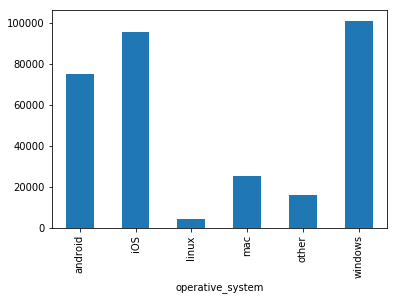

count      mean       std  min  25%  50%  75%  max
operative_system test                                                      
android          0     48210.0  0.016366  0.126879  0.0  0.0  0.0  0.0  1.0
                 1     26725.0  0.012348  0.110435  0.0  0.0  0.0  0.0  1.0
iOS              0     61855.0  0.023587  0.151761  0.0  0.0  0.0  0.0  1.0
                 1     33610.0  0.019994  0.139982  0.0  0.0  0.0  0.0  1.0
linux            0      2207.0  0.015406  0.123187  0.0  0.0  0.0  0.0  1.0
                 1      1928.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
mac              0     16366.0  0.025480  0.157582  0.0  0.0  0.0  0.0  1.0
                 1      8719.0  0.021218  0.144119  0.0  0.0  0.0  0.0  1.0
other            0     10498.0  0.014003  0.117507  0.0  0.0  0.0  0.0  1.0
                 1      5706.0  0.011041  0.104504  0.0  0.0  0.0  0.0  1.0
windows          0     63591.0  0.018698  0.135456  0.0  0.0  0.0  0.0  1.0
                 1     37385.0  0.013990  0.117449  0.0  0.0  0.0  0.0  1.0

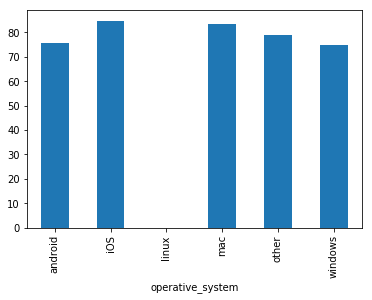

In [22]:
results.groupby('operative_system')['user_id'].count().plot(kind='bar')
plt.show()

df = results.groupby(['operative_system']).apply(lambda x: np.mean(x.loc[x.test==1,'converted'])/np.mean(x.loc[x.test==0,'converted'])*100)
df.plot.bar()

results.groupby(['operative_system','test'])['converted'].describe()

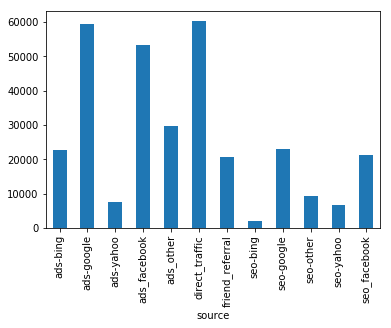

count      mean       std  min  25%  50%  75%  max
source          test                                                      
ads-bing        0     14609.0  0.013348  0.114764  0.0  0.0  0.0  0.0  1.0
                1      8264.0  0.009560  0.097310  0.0  0.0  0.0  0.0  1.0
ads-google      0     37864.0  0.022554  0.148480  0.0  0.0  0.0  0.0  1.0
                1     21515.0  0.019614  0.138674  0.0  0.0  0.0  0.0  1.0
ads-yahoo       0      4818.0  0.016812  0.128580  0.0  0.0  0.0  0.0  1.0
                1      2765.0  0.011212  0.105309  0.0  0.0  0.0  0.0  1.0
ads_facebook    0     34099.0  0.023666  0.152010  0.0  0.0  0.0  0.0  1.0
                1     19297.0  0.016842  0.128683  0.0  0.0  0.0  0.0  1.0
ads_other       0     19284.0  0.015401  0.123146  0.0  0.0  0.0  0.0  1.0
                1     10592.0  0.012462  0.110942  0.0  0.0  0.0  0.0  1.0
direct_traffic  0     38759.0  0.013545  0.115595  0.0  0.0  0.0  0.0  1.0
                1     21598.0  0.010094  0.099961  0.0  0.0  0.0  0.0  1.0
friend_referral 0     13135.0  0.041721  0.199958  0.0  0.0  0.0  0.0  1.0
                1      7560.0  0.033466  0.179861  0.0  0.0  0.0  0.0  1.0
seo-bing        0      1334.0  0.029985  0.170610  0.0  0.0  0.0  0.0  1.0
                1       819.0  0.013431  0.115182  0.0  0.0  0.0  0.0  1.0
seo-google      0     15102.0  0.017547  0.131303  0.0  0.0  0.0  0.0  1.0
                1      8073.0  0.015979  0.125403  0.0  0.0  0.0  0.0  1.0
seo-other       0      5889.0  0.017490  0.131100  0.0  0.0  0.0  0.0  1.0
                1      3371.0  0.012459  0.110940  0.0  0.0  0.0  0.0  1.0
seo-yahoo       0      4363.0  0.019482  0.138227  0.0  0.0  0.0  0.0  1.0
                1      2485.0  0.010463  0.101772  0.0  0.0  0.0  0.0  1.0
seo_facebook    0     13471.0  0.017445  0.130927  0.0  0.0  0.0  0.0  1.0
                1      7734.0  0.013576  0.115732  0.0  0.0  0.0  0.0  1.0

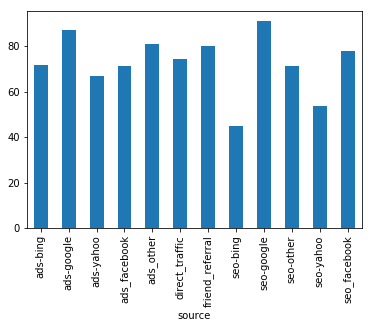

In [26]:
results.groupby('source')['user_id'].count().plot(kind='bar')
plt.show()
df = results.groupby(['source']).apply(lambda x: np.mean(x.loc[x.test==1,'converted'])/np.mean(x.loc[x.test==0,'converted'])*100)
df.plot.bar()
results.groupby(['source','test'])['converted'].describe()

Even though percent decrease in conversion rate is lowest in seo-bing users, they are such a small percentage it wouldn't make any difference whether we increased the price on this users or not.

<a id='cell3'></a>
### Customer Location vs. conversion rate:

In [28]:
data = results.merge(right=users, on =['user_id'],how='left')
data.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [30]:
print(data[data['country']!='USA'].shape)
print(data[data['country']=='USA'].shape)

(41184, 12)
(275616, 12)


61.18
19.7
30.31
-157.8


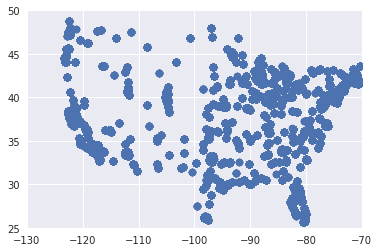

In [49]:
print(data.loc[data['country']=='USA','lat'].max())
print(data.loc[data['country']=='USA','lat'].min())
print(data.loc[data['country']=='USA','long'].max())
print(data.loc[data['country']=='USA','long'].min())

plt.scatter(data.loc[data['country']=='USA','long'],data.loc[data['country']=='USA','lat'])
plt.xlim([-130,-70])
plt.ylim([25,50])
plt.show()

Nice plot of site visits in the USA

In [71]:
df.loc[(35<df['lat'])&(df['lat']<40),:]
print(df['lat'])

Series([], Name: lat, dtype: float64)


[ 50.   47.5  45.   42.5  40.   37.5  35.   32.5  30.   27.5]
[-130 -125 -120 -115 -110 -105 -100  -95  -90  -85  -80  -75]
(0, 12)


/home/eminozkan/miniconda3/envs/dc1/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/eminozkan/miniconda3/envs/dc1/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


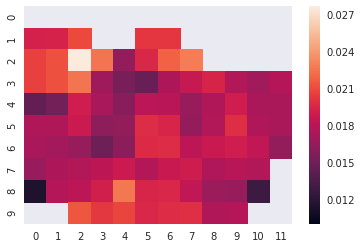

In [80]:
lat_values = np.arange(50,25,-2.5)
long_values = np.arange(-130,-70,5)
print(lat_values)
print(long_values)
lat_long_conversion = np.zeros(shape=(len(lat_values),len(long_values)))

print(df.shape)
for i in range(len(lat_values)):
    for j in range(len(long_values)):
        lat_value = lat_values[i]
        long_value = long_values[j]
        df = data.loc[(data['country']=='USA')]
        df = df[(lat_value<df['lat'])&(df['lat']<lat_value+5)]
        df = df[(long_value<df['long'])&(df['long']<long_value+10)]
        lat_long_conversion[i][j]=np.nanmean(df['converted'])
ax = sns.heatmap(lat_long_conversion,vmin=0.010)

Based on these results it looks the price can be adjusted by geographical location as well. At places where conversion rate is highest, maybe we can also afford much higher prices

### FUTURE WORK

I think it would be very interesting to build a machine learning model in order to customize pricing for each individual based on their features in order to maximize the revenue for the company